<a href="https://colab.research.google.com/github/ebagdasa/federated/blob/master/analytics/location_heatmaps/dp_location_heatmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ebagdasa/federated.git

fatal: destination path 'federated' already exists and is not an empty directory.


In [2]:
!cd federated && git checkout master && git pull

Already on 'master'
Your branch is up to date with 'origin/master'.
Already up to date.


In [11]:
!pip install torch
!pip install matplotlib
!pip install tqdm
!pip install pygtrie

In [3]:
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm

In [4]:
import sys
sys.path.insert(1, "federated/analytics/location_heatmaps")

In [5]:
from run_experiment import *
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import trange, tqdm
import geo_utils
import metrics
import mechanisms

In [6]:
!wget https://static01.nyt.com/images/2018/12/14/business/10location-insider/10location-promo-superJumbo-v2.jpg

--2021-07-01 23:12:58--  https://static01.nyt.com/images/2018/12/14/business/10location-insider/10location-promo-superJumbo-v2.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1710925 (1.6M) [image/jpeg]
Saving to: ‘10location-promo-superJumbo-v2.jpg’

10location-promo-su 100%[===================>]   1.63M  --.-KB/s    in 0.08s   

2021-07-01 23:12:58 (20.1 MB/s) - ‘10location-promo-superJumbo-v2.jpg’ saved [1710925/1710925]



In [7]:
true_image, dataset = get_data('10location-promo-superJumbo-v2.jpg')

100%|██████████| 1024/1024 [00:17<00:00, 58.22it/s]


In [ ]:
plt.imshow(true_image)

### No DP

positivity: False
Total of 1000.0 SecAgg rounds per level


  2%|▏         | 1621/100000 [00:00<00:11, 8347.81it/s]

Level: 0. Eps: None. Threshold: -100000.00. Remaining: 0.00


Level: 0. MSE: 1.10e-11, without sampling error: 1.42e-12.


  1%|▏         | 1354/100000 [00:00<00:14, 6884.54it/s]

Level: 1. Eps: None. Threshold: -100000.00. Remaining: 0.00


Level: 1. MSE: 1.07e-11, without sampling error: 1.15e-12.


  1%|          | 858/100000 [00:00<00:11, 8575.92it/s]

Level: 2. Eps: None. Threshold: -100000.00. Remaining: 0.00


Level: 2. MSE: 1.05e-11, without sampling error: 9.32e-13.


  1%|          | 907/100000 [00:00<00:10, 9065.47it/s]

Level: 3. Eps: None. Threshold: -100000.00. Remaining: 0.00


Level: 3. MSE: 1.04e-11, without sampling error: 8.14e-13.


  1%|          | 934/100000 [00:00<00:10, 9331.67it/s]

Level: 4. Eps: None. Threshold: -100000.00. Remaining: 0.00


Level: 4. MSE: 1.03e-11, without sampling error: 7.41e-13.
Total epsilon-users: 0.00 with 0.00 eps per person. 


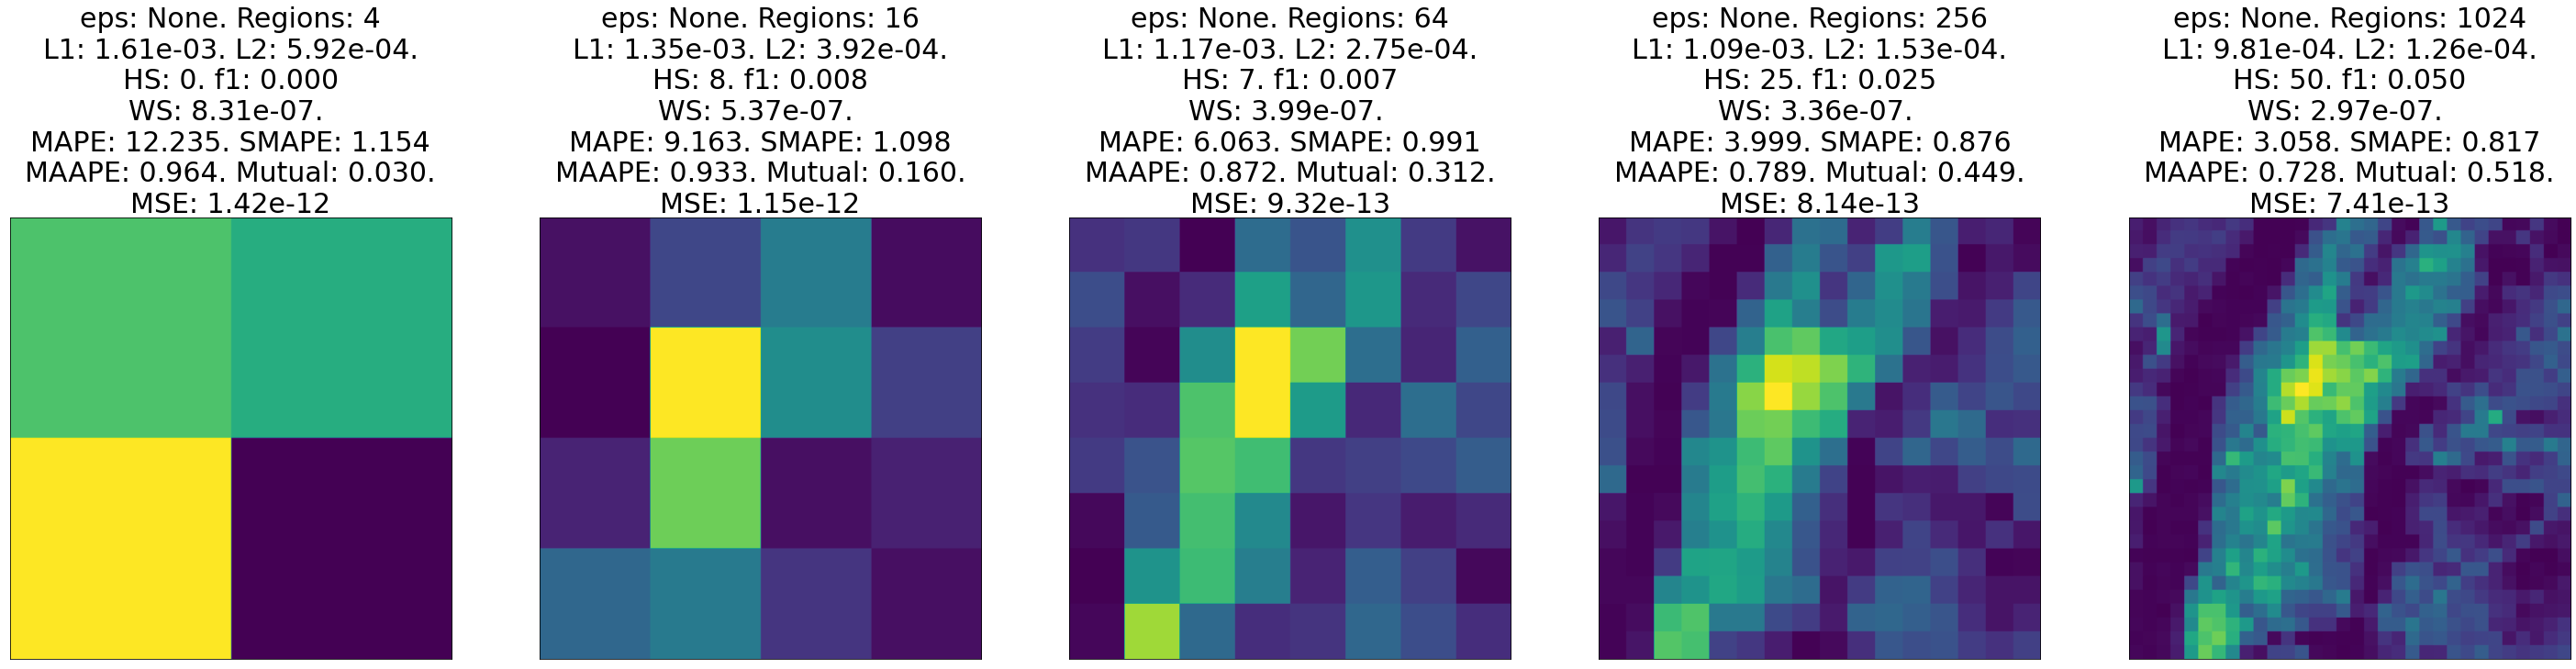

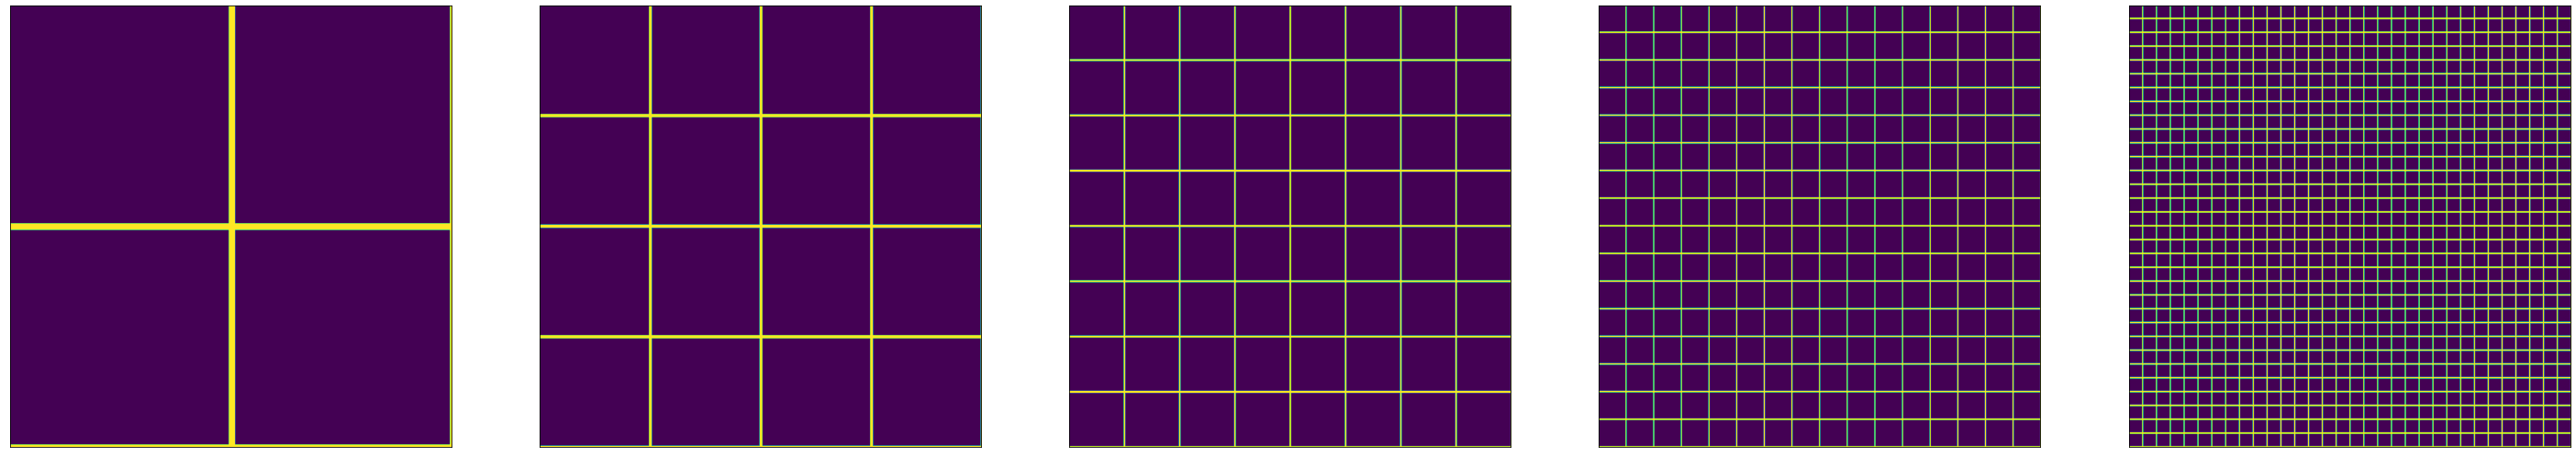

In [10]:
users = 100000
secagg_size = 100
c = secagg_size / users
res10 = run_experiment(true_image,
                   dataset,
                   level_sample_size=users,
                   secagg_round_size=secagg_size,
                   eps_func=lambda x, num_regions: None,
                   threshold=-100000,
                   top_k=TOPK,
                   partial=1,
                   max_levels=5,
                   total_size=TOTAL_SIZE,
                   min_dp_size=None,
                   dropout_rate=None,
                   output_flag=True,
                   quantize=None,
                   save_gif=False,
                   positivity=False, start_with_level=-1,
                   last_result_ci=False)

In [10]:
true_image.var()

4351.288956855748

positivity: False
Total of 10.0 SecAgg rounds per level


  0%|          | 0/100000 [00:00<?, ?it/s]

Level: 0. Eps: 0.003577706855891111. Threshold: 10.00. Remaining: 1.00


Level: 0. MSE: 1.09e-11, without sampling error: 1.42e-12.


  1%|          | 901/100000 [00:00<00:11, 8761.31it/s]

Level: 1. Eps: 0.014310712939686405. Threshold: 10.00. Remaining: 1.00


Level: 1. MSE: 1.07e-11, without sampling error: 1.15e-12.


  1%|          | 701/100000 [00:00<00:14, 6782.23it/s]

Level: 2. Eps: 0.05723552747969013. Threshold: 10.00. Remaining: 0.98


Level: 2. MSE: 1.04e-11, without sampling error: 9.36e-13.


  0%|          | 301/100000 [00:00<00:33, 2957.69it/s]

Level: 3. Eps: 0.22847608844135425. Threshold: 10.00. Remaining: 0.92


Level: 3. MSE: 1.03e-11, without sampling error: 8.17e-13.


  0%|          | 101/100000 [00:00<02:25, 688.18it/s]

Last round. Spending remaining epsilon budget: 69639.9964283378
Level: 4. Eps: 0.696399964283378. Threshold: 10.00. Remaining: 0.70


Level: 4. MSE: 1.02e-11, without sampling error: 7.50e-13.
Total epsilon-users: 100000.00 with 1.00 eps per person. 


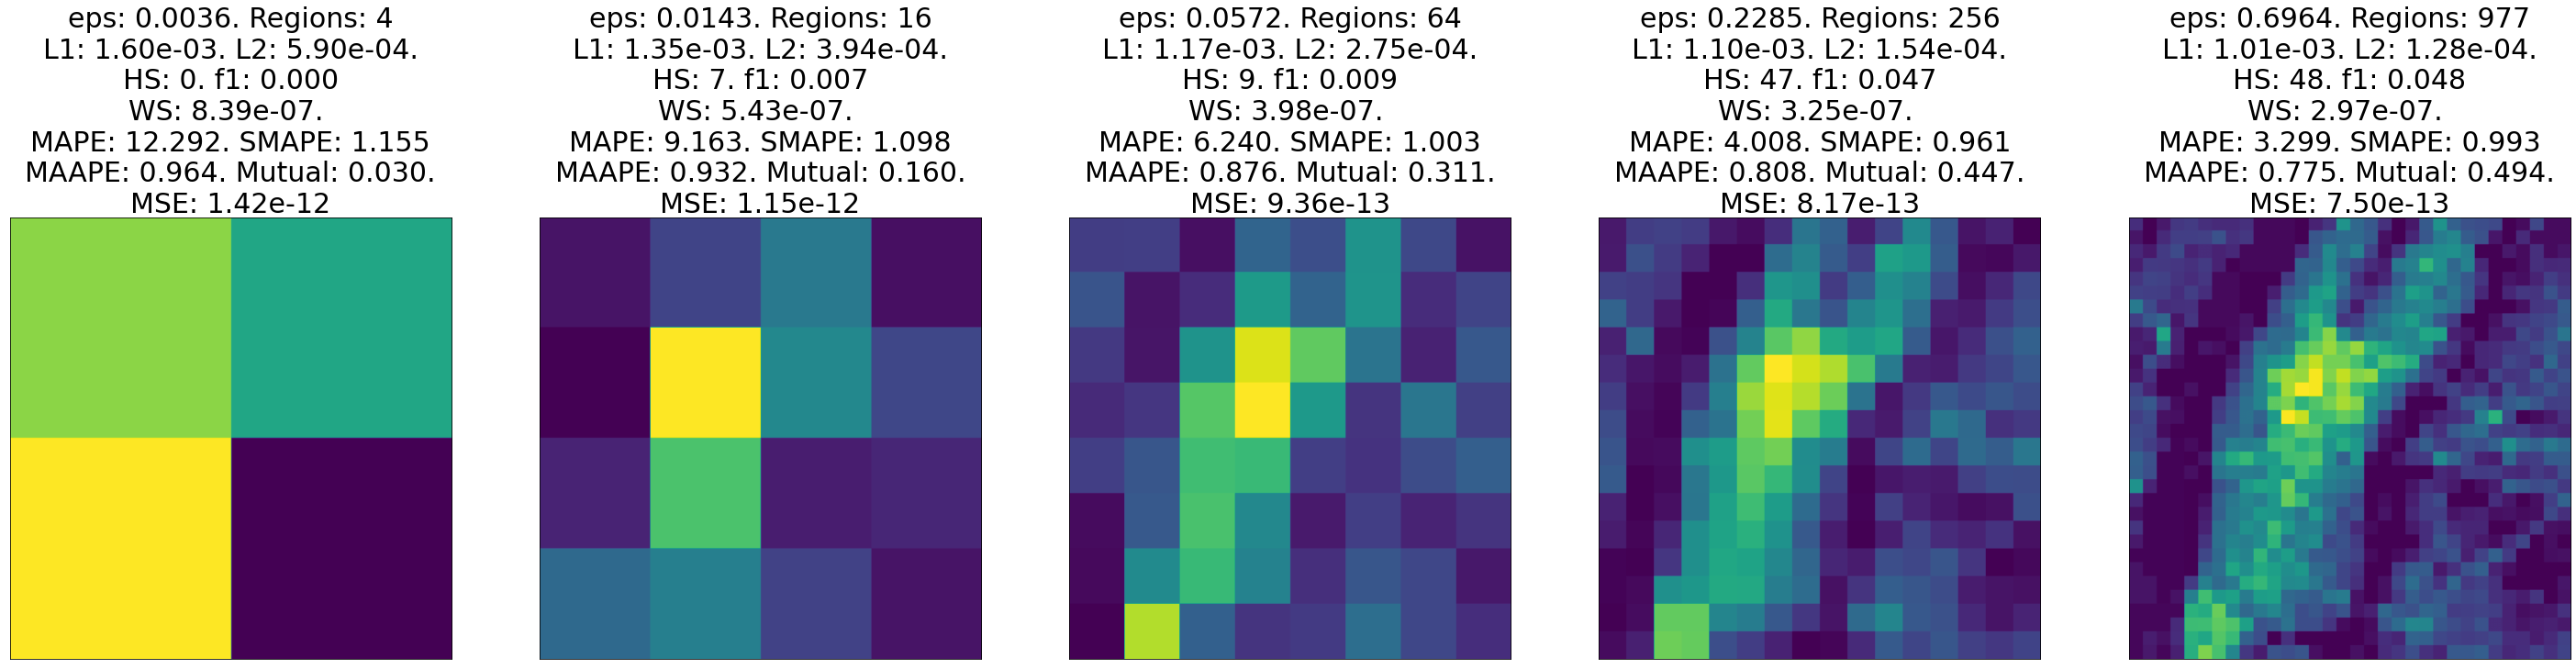

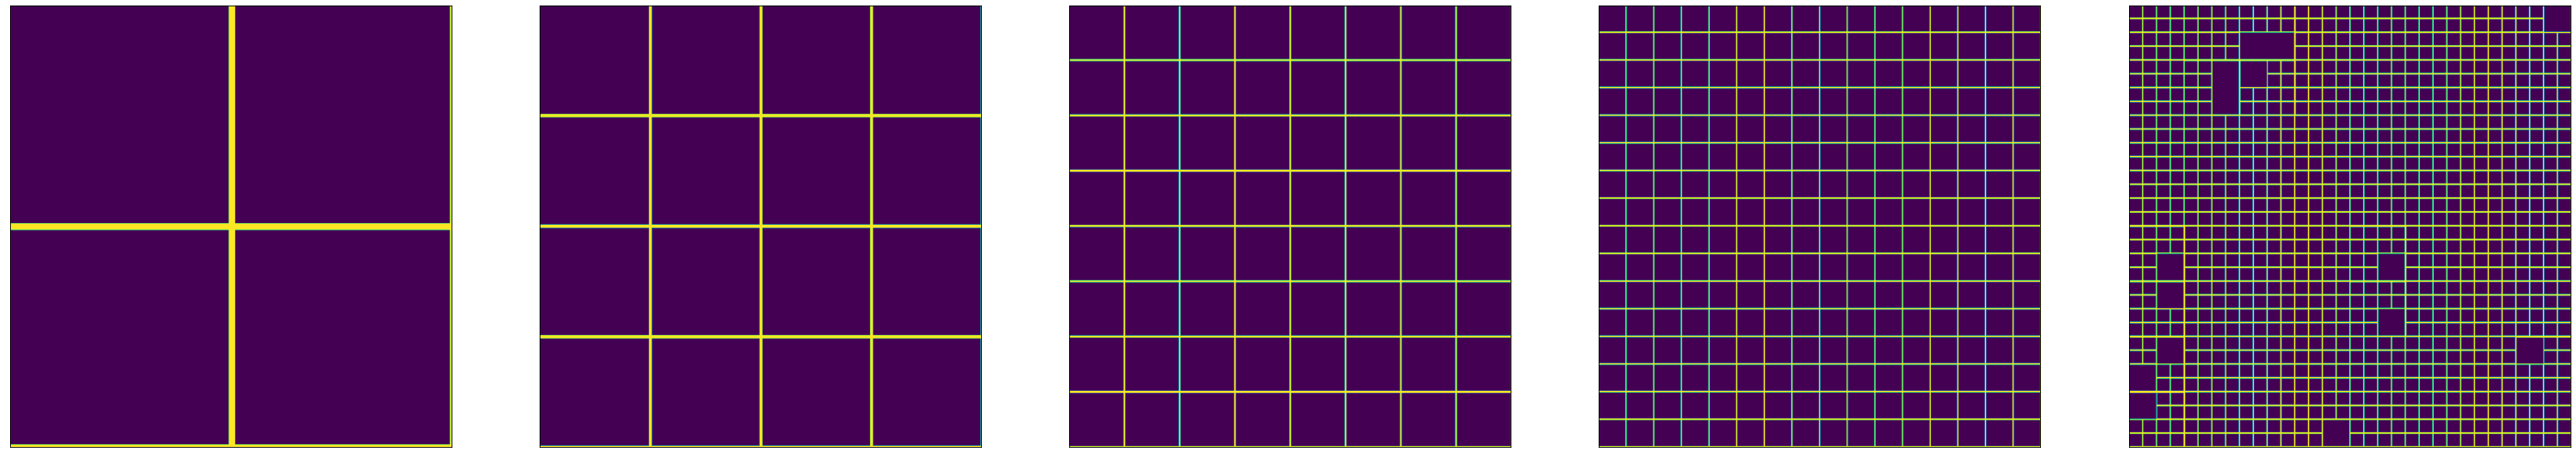

In [8]:
users = 100000
secagg_size = 10000
c = 1/10
res10 = run_experiment(true_image,
                   dataset,
                   level_sample_size=users,
                   secagg_round_size=secagg_size,
                   eps_func=lambda x, num_regions: mechanisms.get_eps_from_two_std(c * np.sqrt(secagg_size / users) * users/num_regions),
                   threshold_func=lambda i, prefix_len, eps, remaining: 10,
                   collapse_func=lambda threshold: max(5, 1/4 * threshold),
                       total_epsilon_budget=1*users,
                   top_k=TOPK,
                   partial=100,
                   max_levels=10,
                   total_size=TOTAL_SIZE,
                   min_dp_size=9000,
                   dropout_rate=0.1,
                   output_flag=True,
                   quantize=None,
                   save_gif=False,
                   positivity=False, start_with_level=-1,
                   last_result_ci=False)


# Adding more data

In [9]:
split_dataset = geo_utils.makeGaussian(true_image, 1024, 500, [200, 900], convert=True, save=True, load=False)


100%|██████████| 1024/1024 [00:17<00:00, 58.57it/s] 


Saved to split_dataset_500_200_900.pt


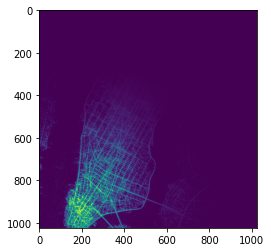

In [11]:
plt.imshow(split_dataset['pos_image'])

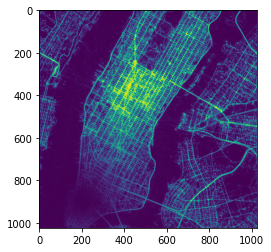

In [12]:
plt.imshow(split_dataset['neg_image'])